In [2]:
!pip install matplotlib > /dev/null
!pip install seaborn > /dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.2 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 14.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.5 MB/s eta 0:00:00a 0:00:01


In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

def main():
    path = "../dataset/gri-qa_extra.csv"

    df = pd.read_csv(path)

    full_dataset_size = len(df)
    error_size = len(df[df['Error (0 no error, 1 value err, 2 unrelated, 3 hierarchical)'] == 2])
    hier_size = len(df[df['Error (0 no error, 1 value err, 2 unrelated, 3 hierarchical)'] == 3])

    df_extr = df[
        df['Error (0 no error, 1 value err, 2 unrelated, 3 hierarchical)'].isin([0, 1]) |
        pd.isna(df['Error (0 no error, 1 value err, 2 unrelated, 3 hierarchical)'])
    ]
    df_hier = df[df['Error (0 no error, 1 value err, 2 unrelated, 3 hierarchical)'] == 3]

    extr_size = len(df_extr)

    df_correct = pd.concat([df_extr, df_hier])

    count_pdfs = df_correct.groupby("pdf name")["gri"].count()
    count_pdfs_extr = df_extr.groupby("pdf name")["gri"].count()
    count_pdfs_hier = df_hier.groupby("pdf name")["gri"].count()
    count_gri = df_correct.groupby("gri")["checked"].count()
    count_gri_extr = df_extr.groupby("gri")["checked"].count()
    count_gri_hier = df_hier.groupby("gri")["checked"].count()
        
    count_nr_tables_extr = len(df_extr.groupby(["pdf name", "page nbr", "table nbr"]))
    count_nr_tables_hier = len(df_hier.groupby(["pdf name", "page nbr", "table nbr"]))
    count_nr_tables_total = len(df_correct.groupby(["pdf name", "page nbr", "table nbr"]))
    
    df_correct['table id'] = df_correct['pdf name'] + '_' + df_correct['page nbr'].astype(str) + '_' + df_correct['table nbr'].astype(str)
    df_extr['table id'] = df_extr['pdf name'] + '_' + df_extr['page nbr'].astype(str) + '_' + df_extr['table nbr'].astype(str)
    df_hier['table id'] = df_hier['pdf name'] + '_' + df_hier['page nbr'].astype(str) + '_' + df_hier['table nbr'].astype(str)

    nr_tables_per_gri = df_correct.groupby('gri')['table id'].nunique()
    nr_tables_per_gri_extr = df_extr.groupby('gri')['table id'].nunique()
    nr_tables_per_gri_hier = df_hier.groupby('gri')['table id'].nunique()

    nr_gri_per_table = df_correct.groupby('table id')['gri'].nunique()
    nr_gri_per_table_extr = df_extr.groupby('table id')['gri'].nunique()
    nr_gri_per_table_hier = df_hier.groupby('table id')['gri'].nunique()

    # Calculate the frequency distribution: count how many tables have a specific number of unique GRIs
    frequency_distribution = nr_gri_per_table.value_counts()
    frequency_distribution_extr = nr_gri_per_table_extr.value_counts()
    frequency_distribution_hier = nr_gri_per_table_hier.value_counts()
    
    #how many tables for each company
    nr_tables_per_company = df_correct.groupby('pdf name')['table id'].nunique()
    nr_tables_per_company_extr = df_extr.groupby('pdf name')['table id'].nunique()
    nr_tables_per_company_hier = df_hier.groupby('pdf name')['table id'].nunique()
    
    #how many questions on average per table
    avg_questions_per_table = df_correct.groupby('table id')['question'].count().mean()
    avg_questions_per_table_extr = df_extr.groupby('table id')['question'].count().mean()
    avg_questions_per_table_hier = df_hier.groupby('table id')['question'].count().mean()

    return {
        "full_dataset_size": full_dataset_size,
        "error_size": error_size,
        "hier_size": hier_size,
        "extr_size": extr_size,
        "count_pdfs": count_pdfs,
        "count_pdfs_extr": count_pdfs_extr,
        "count_pdfs_hier": count_pdfs_hier,
        "count_gri": count_gri,
        "count_gri_extr": count_gri_extr,
        "count_gri_hier": count_gri_hier,
        "count_nr_tables_extr": count_nr_tables_extr,
        "count_nr_tables_hier": count_nr_tables_hier,
        "count_nr_tables_total": count_nr_tables_total,
        "nr_tables_per_gri": nr_tables_per_gri,
        "nr_tables_per_gri_extr": nr_tables_per_gri_extr,
        "nr_tables_per_gri_hier": nr_tables_per_gri_hier,
        "frequency_distribution": frequency_distribution,
        "frequency_distribution_extr": frequency_distribution_extr,
        "frequency_distribution_hier": frequency_distribution_hier,
        "nr_tables_per_company": nr_tables_per_company,
        "nr_tables_per_company_extr": nr_tables_per_company_extr,
        "nr_tables_per_company_hier": nr_tables_per_company_hier,
        "avg_questions_per_table": avg_questions_per_table,
        "avg_questions_per_table_extr": avg_questions_per_table_extr,
        "avg_questions_per_table_hier": avg_questions_per_table_hier
    }


stats = main()

/tmp/ipykernel_32468/3243609244.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extr['table id'] = df_extr['pdf name'] + '_' + df_extr['page nbr'].astype(str) + '_' + df_extr['table nbr'].astype(str)
/tmp/ipykernel_32468/3243609244.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hier['table id'] = df_hier['pdf name'] + '_' + df_hier['page nbr'].astype(str) + '_' + df_hier['table nbr'].astype(str)


/tmp/ipykernel_32468/2136207511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dataset_sizes.keys()), y=list(dataset_sizes.values()), palette="plasma")


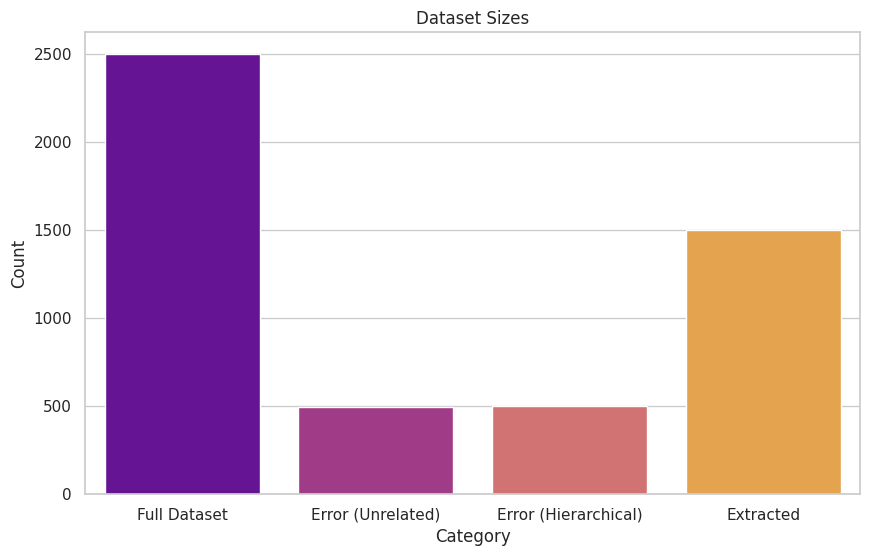

In [57]:
# dataset sizes
dataset_sizes = {
    "Full Dataset": stats["full_dataset_size"],
    "Error (Unrelated)": stats["error_size"],
    "Error (Hierarchical)": stats["hier_size"],
    "Extracted": stats["extr_size"]
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(dataset_sizes.keys()), y=list(dataset_sizes.values()), palette="plasma")
plt.title("Dataset Sizes")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

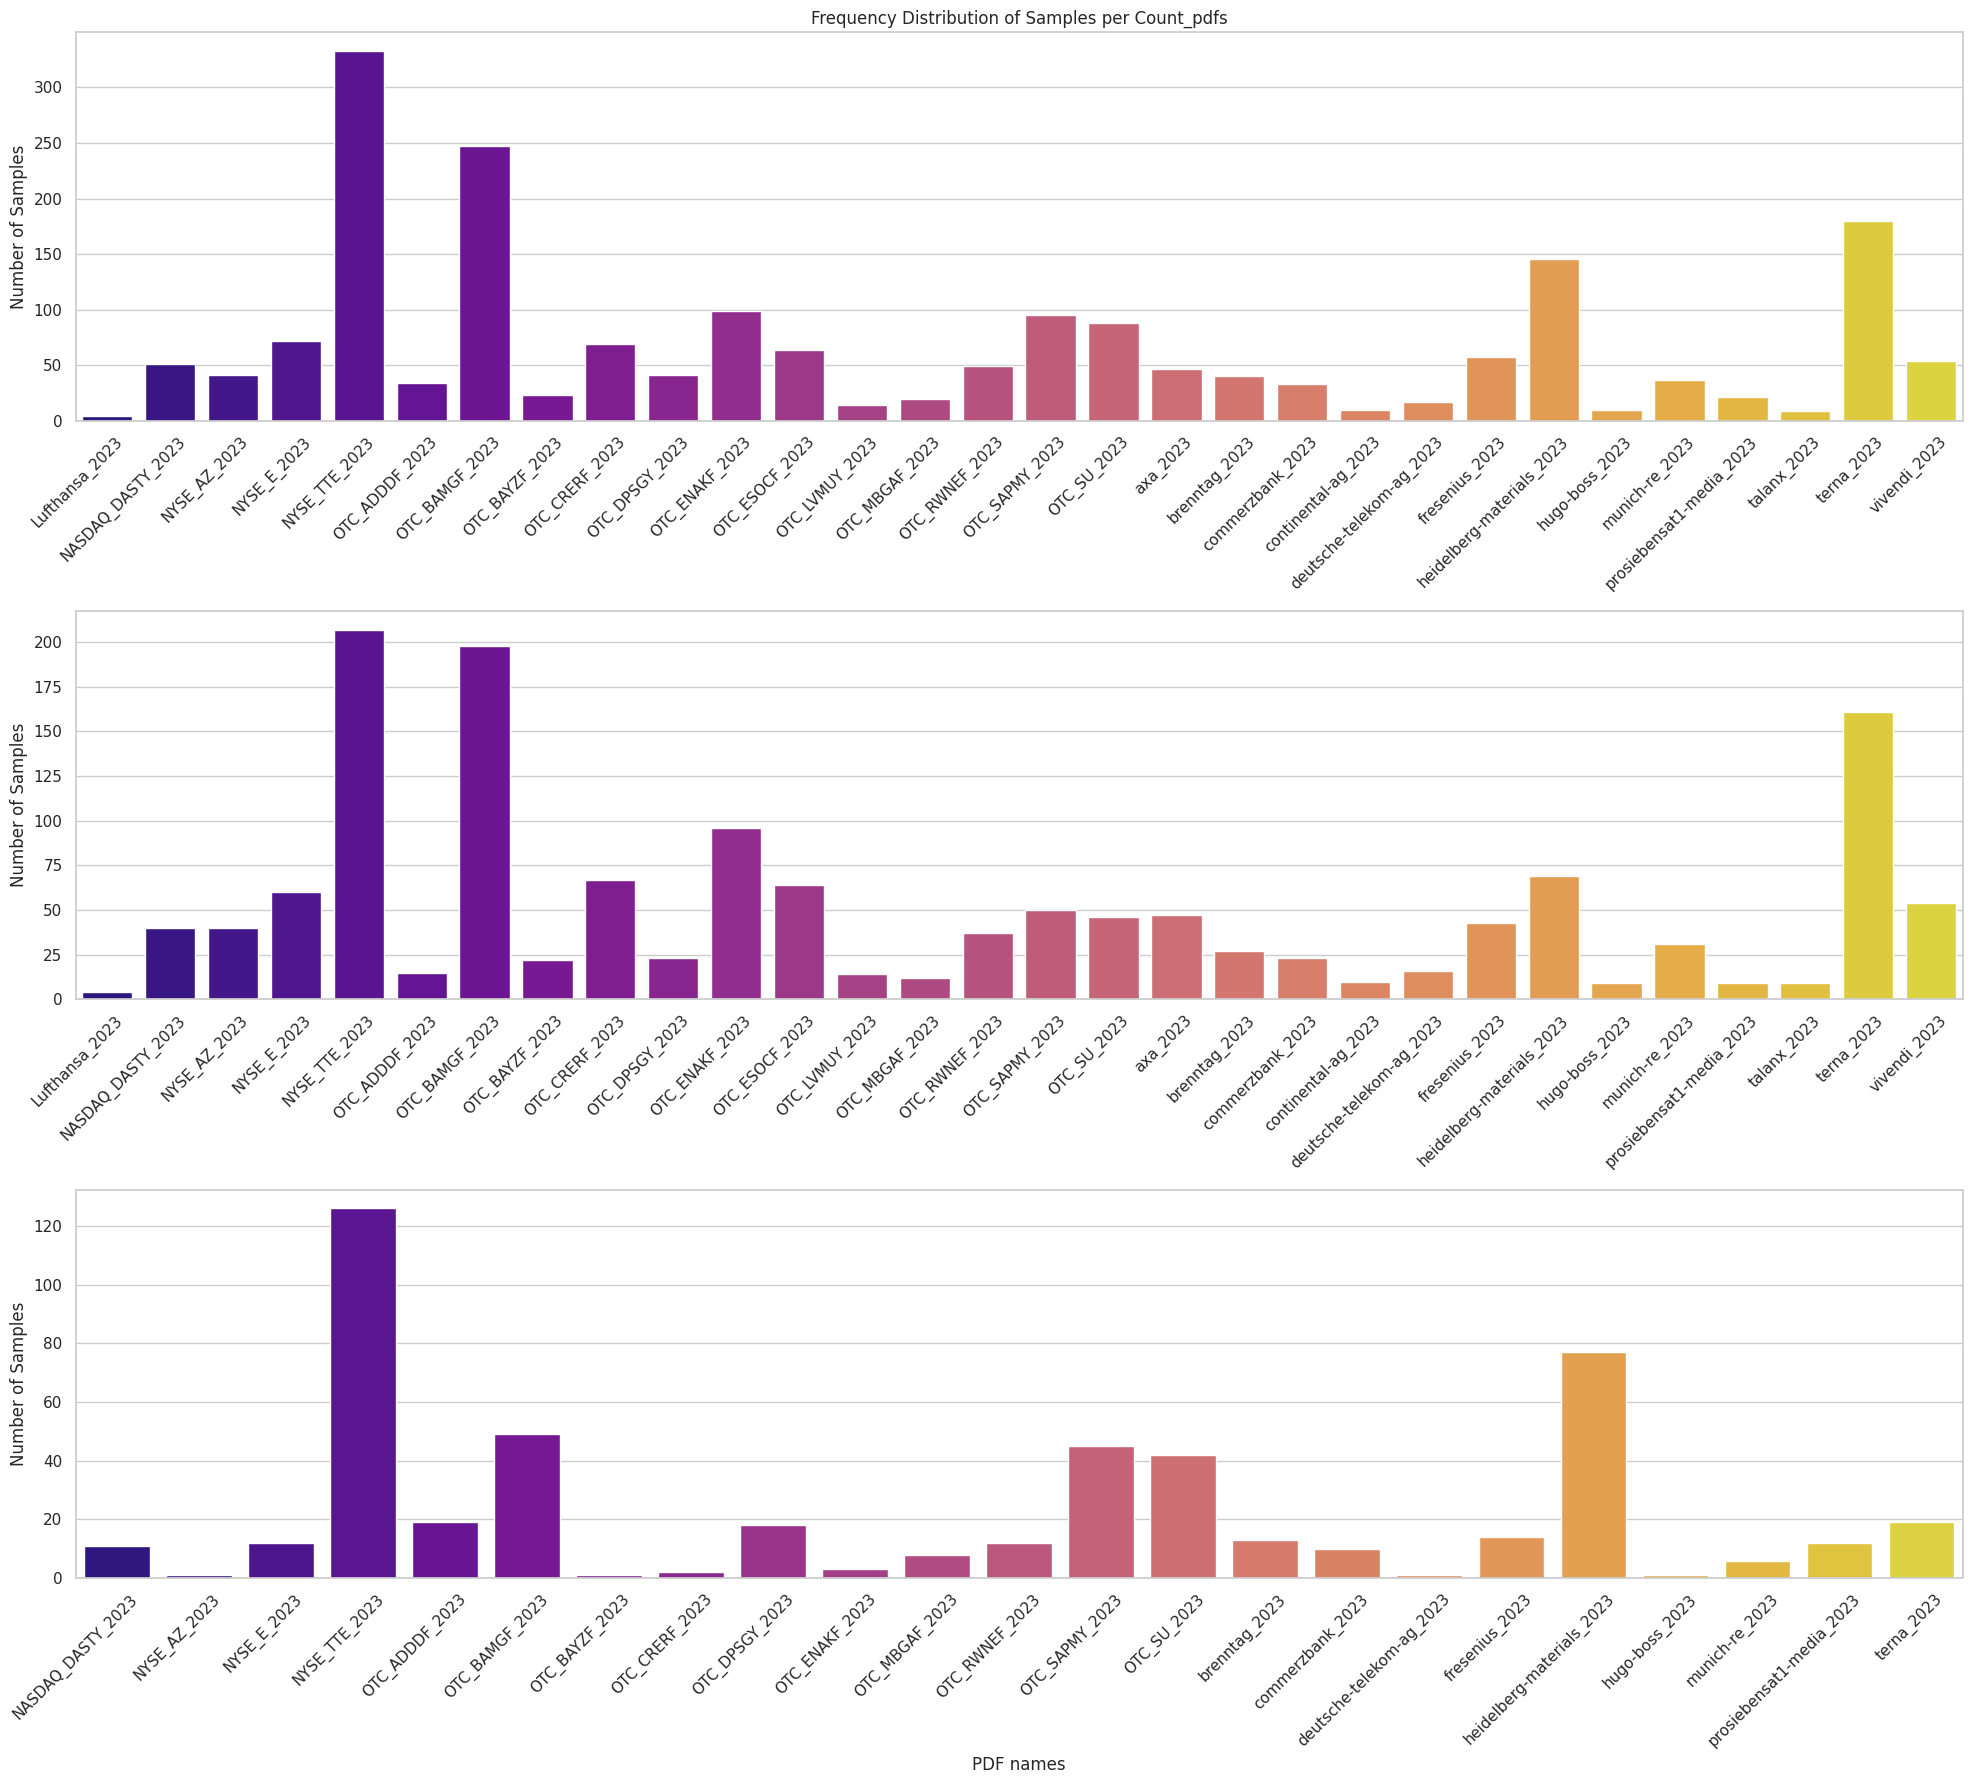

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

count_pdf_dfs = [
    ("count_pdfs", stats["count_pdfs"]),
    ("count_pdfs_extr", stats["count_pdfs_extr"]),
    ("count_pdfs_hier", stats["count_pdfs_hier"])
]

plt.figure(figsize=(20, 18))

for i, (name, count_pdf) in enumerate(count_pdf_dfs, start=1):
    count_pdf_df = count_pdf.to_frame().reset_index()
    count_pdf_df.columns = ["pdf name", "frequency"]
    count_pdf_df["pdf name"] = count_pdf_df["pdf name"].apply(lambda x: x.split(".")[0])
    
    plt.subplot(3, 1, i)
    sns.barplot(data=count_pdf_df, x="pdf name", y="frequency", palette="plasma", hue="pdf name", legend=False)
    if i == 1:
        plt.title(f"Frequency Distribution of Samples per {name.capitalize()}")
    else:
        plt.title("")
    plt.ylabel("Number of Samples")
    if i == 3:
        plt.xlabel("PDF names")
    else:
        plt.xlabel("")
    plt.xticks(rotation=45, ha="right")
    
    ax = plt.gca()
    new_xticks = [tick + 0.3 for tick in ax.get_xticks()]
    ax.set_xticks(new_xticks)

plt.tight_layout()
plt.show()

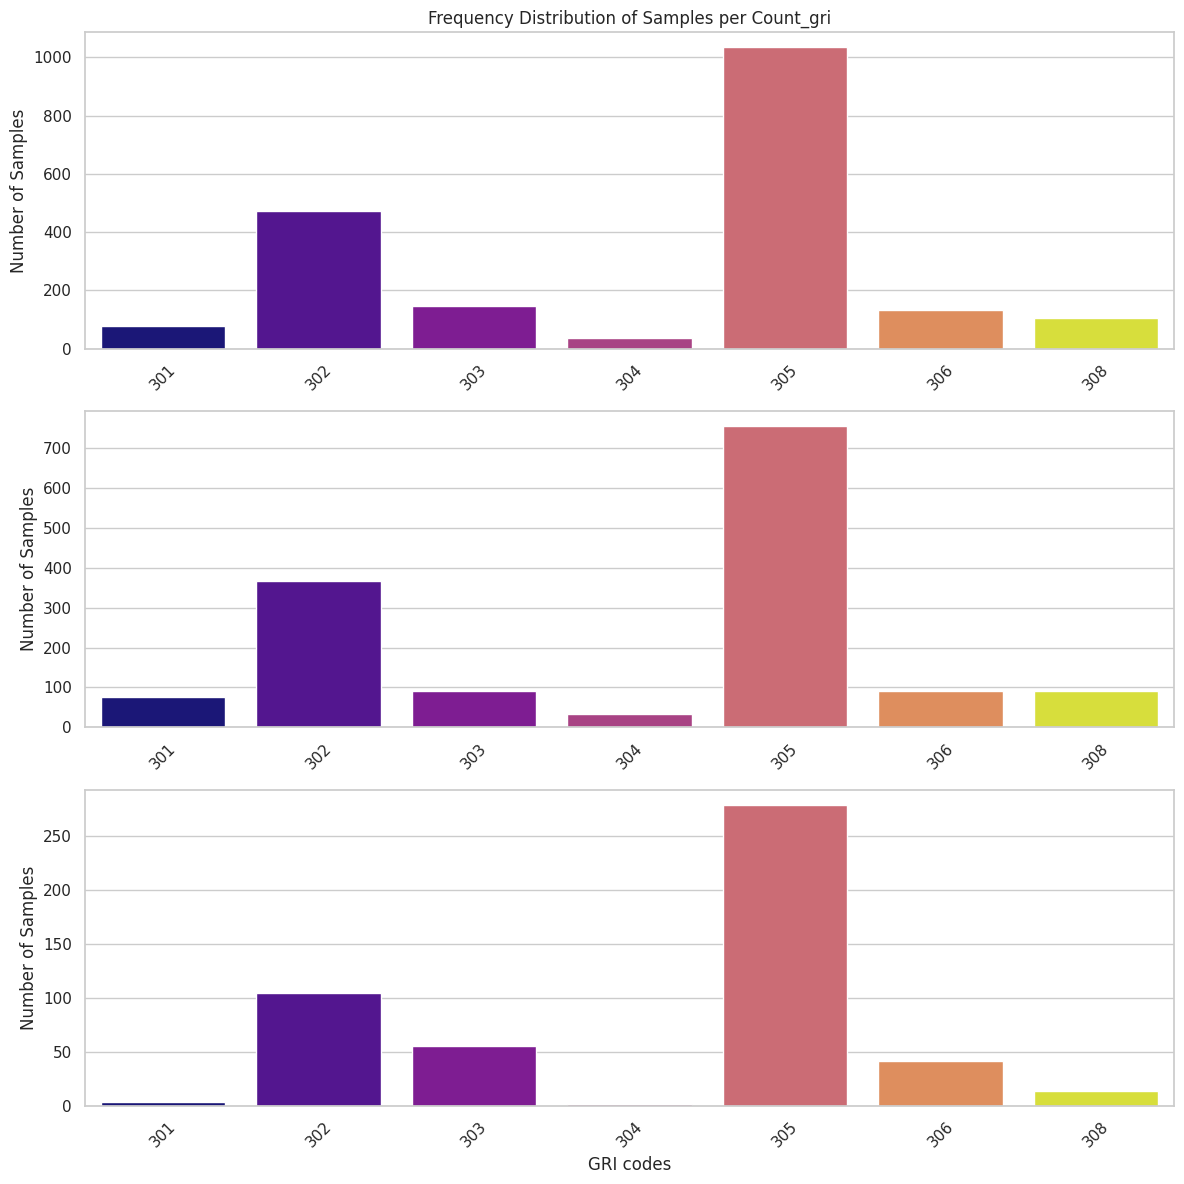

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

count_gri_dfs = [
    ("count_gri", stats["count_gri"]),
    ("count_gri_extr", stats["count_gri_extr"]),
    ("count_gri_hier", stats["count_gri_hier"])
]

plt.figure(figsize=(12, 12))

for i, (name, count_gri) in enumerate(count_gri_dfs, start=1):
    count_gri_df = count_gri.to_frame().reset_index()
    count_gri_df.columns = ["GRI code", "frequency"]
    
    plt.subplot(3, 1, i)
    sns.barplot(data=count_gri_df, x="GRI code", y="frequency", palette="plasma", hue="GRI code", legend=False)
    if i == 1:
        plt.title(f"Frequency Distribution of Samples per {name.capitalize()}")
    else:
        plt.title("")
    plt.ylabel("Number of Samples")
    if i == 3:
        plt.xlabel("GRI codes")
    else:
        plt.xlabel("")
    plt.xticks(rotation=45, ha="right")
    
    ax = plt.gca()
    new_xticks = [tick + 0.1 for tick in ax.get_xticks()]
    ax.set_xticks(new_xticks)

plt.tight_layout()
plt.show()

/tmp/ipykernel_32468/1317409448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Total", "Extractive", "Hierarchical"], y=frequency_tables, palette="plasma")


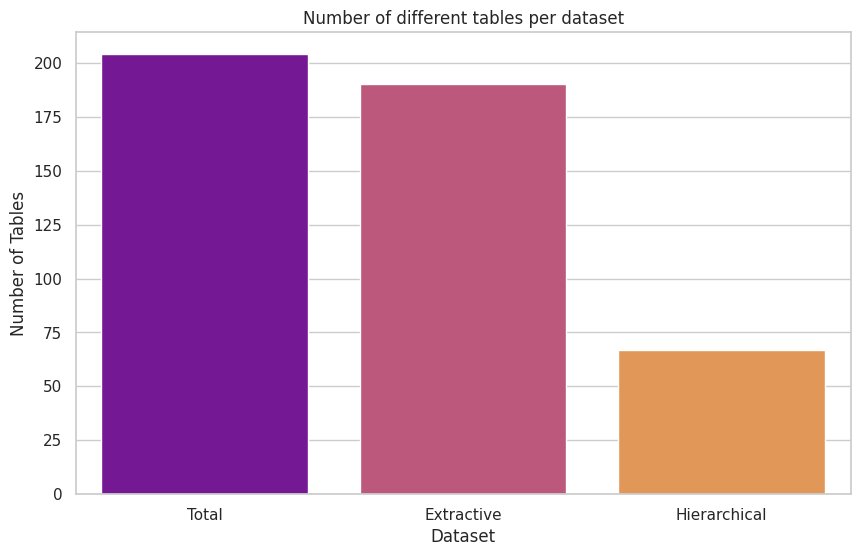

In [77]:
# 2. Frequency distribution of unique GRIs per table
frequency_tables = [stats["count_nr_tables_total"], stats["count_nr_tables_extr"], stats["count_nr_tables_hier"]]
plt.figure(figsize=(10, 6))
sns.barplot(x=["Total", "Extractive", "Hierarchical"], y=frequency_tables, palette="plasma")
plt.title("Number of different tables per dataset")
plt.ylabel("Number of Tables")
plt.xlabel("Dataset")
plt.show()

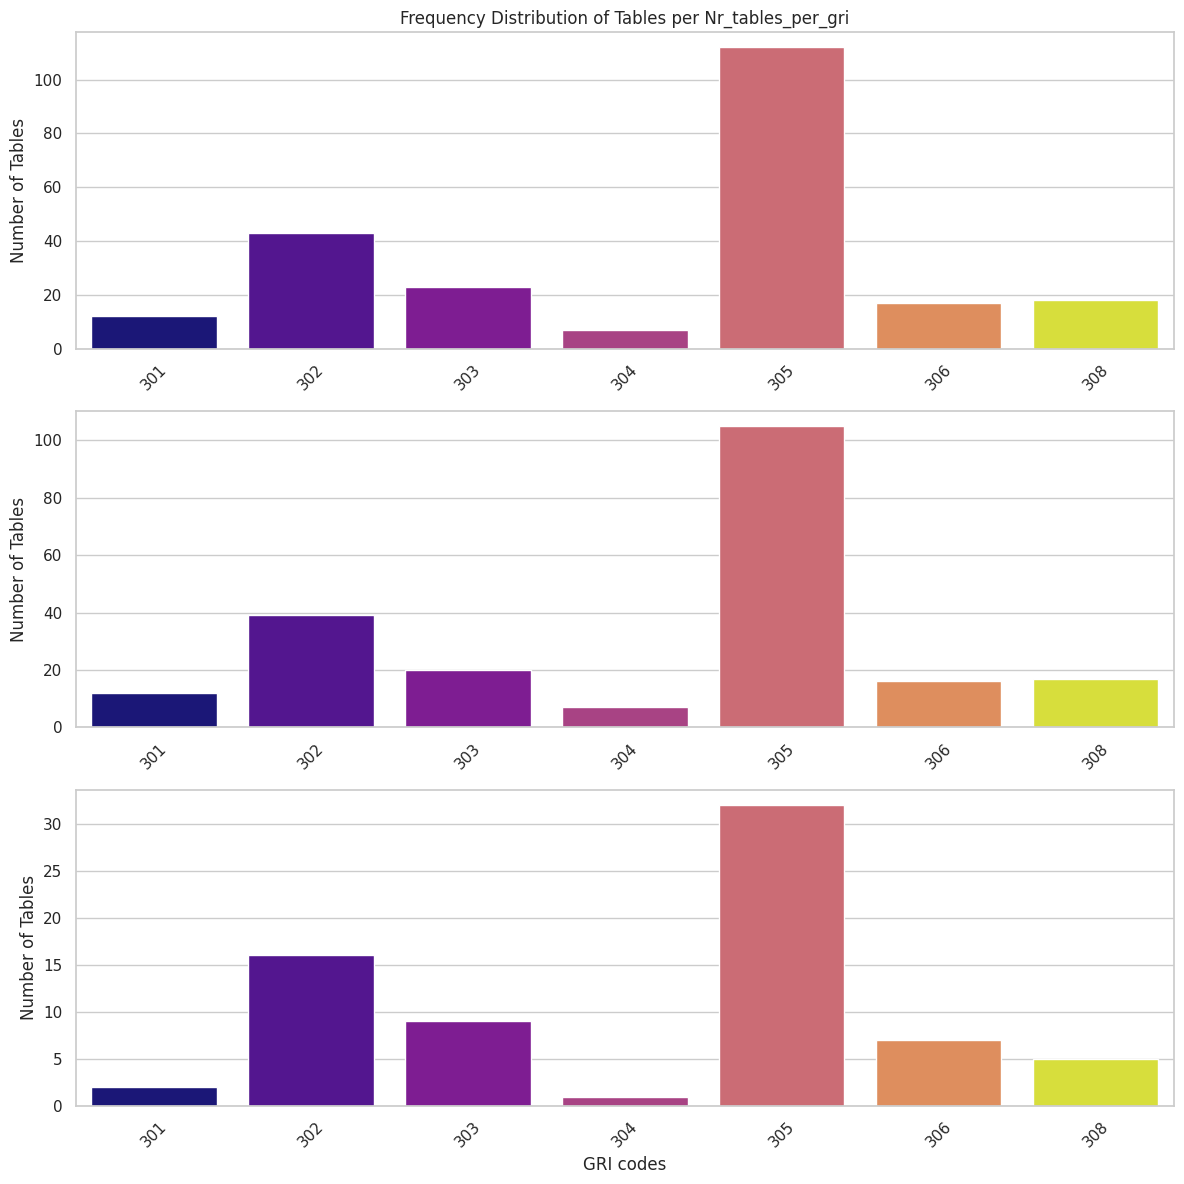

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

count_gri_dfs = [
    ("nr_tables_per_gri", stats["nr_tables_per_gri"]),
    ("nr_tables_per_gri_extr", stats["nr_tables_per_gri_extr"]),
    ("nr_tables_per_gri_hier", stats["nr_tables_per_gri_hier"])
]

plt.figure(figsize=(12, 12))

for i, (name, count_gri) in enumerate(count_gri_dfs, start=1):
    count_gri_df = count_gri.to_frame().reset_index()
    count_gri_df.columns = ["GRI code", "frequency"]
    
    plt.subplot(3, 1, i)
    sns.barplot(data=count_gri_df, x="GRI code", y="frequency", palette="plasma", hue="GRI code", legend=False)
    if i == 1:
        plt.title(f"Frequency Distribution of Tables per {name.capitalize()}")
    else:
        plt.title("")
    plt.ylabel("Number of Tables")
    if i == 3:
        plt.xlabel("GRI codes")
    else:
        plt.xlabel("")
    plt.xticks(rotation=45, ha="right")
    
    ax = plt.gca()
    new_xticks = [tick + 0.1 for tick in ax.get_xticks()]
    ax.set_xticks(new_xticks)

plt.tight_layout()
plt.show()

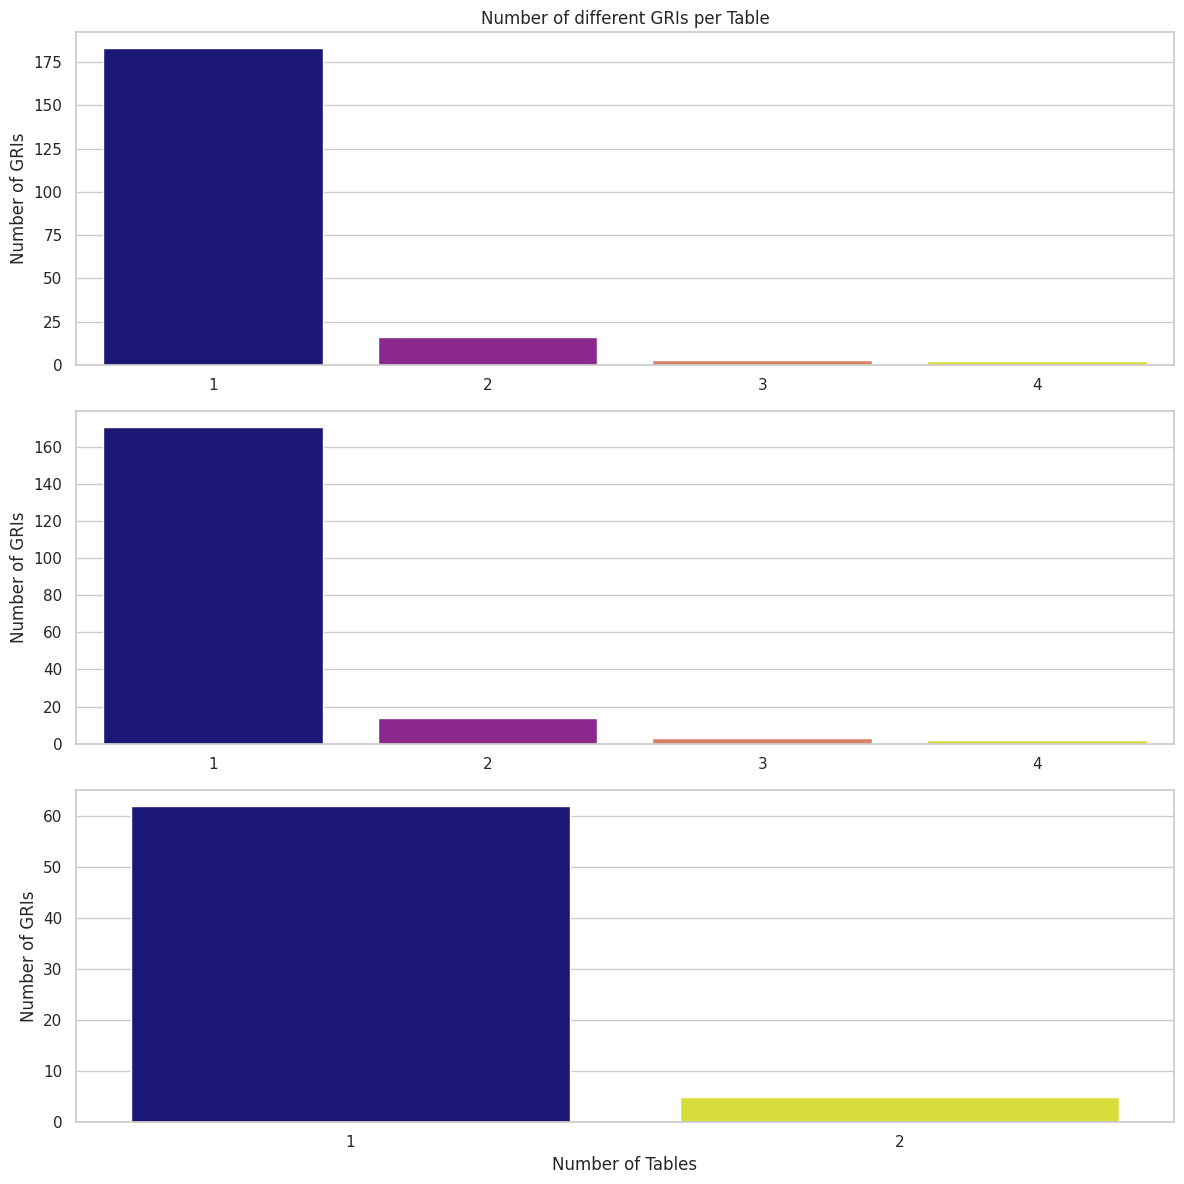

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

count_gri_dfs = [
    ("frequency_distribution", stats["frequency_distribution"]),
    ("frequency_distribution_extr", stats["frequency_distribution_extr"]),
    ("frequency_distribution_hier", stats["frequency_distribution_hier"])
]

plt.figure(figsize=(12, 12))

for i, (name, count_gri) in enumerate(count_gri_dfs, start=1):
    count_gri_df = count_gri.to_frame().reset_index()
    count_gri_df.columns = ["num tables", "frequency"]
    
    plt.subplot(3, 1, i)
    sns.barplot(data=count_gri_df, x="num tables", y="frequency", palette="plasma", hue="num tables", legend=False)
    if i == 1:
        plt.title(f"Number of different GRIs per Table")
    else:
        plt.title("")
    plt.ylabel("Number of GRIs")
    if i == 3:
        plt.xlabel("Number of Tables")
    else:
        plt.xlabel("")

plt.tight_layout()
plt.show()

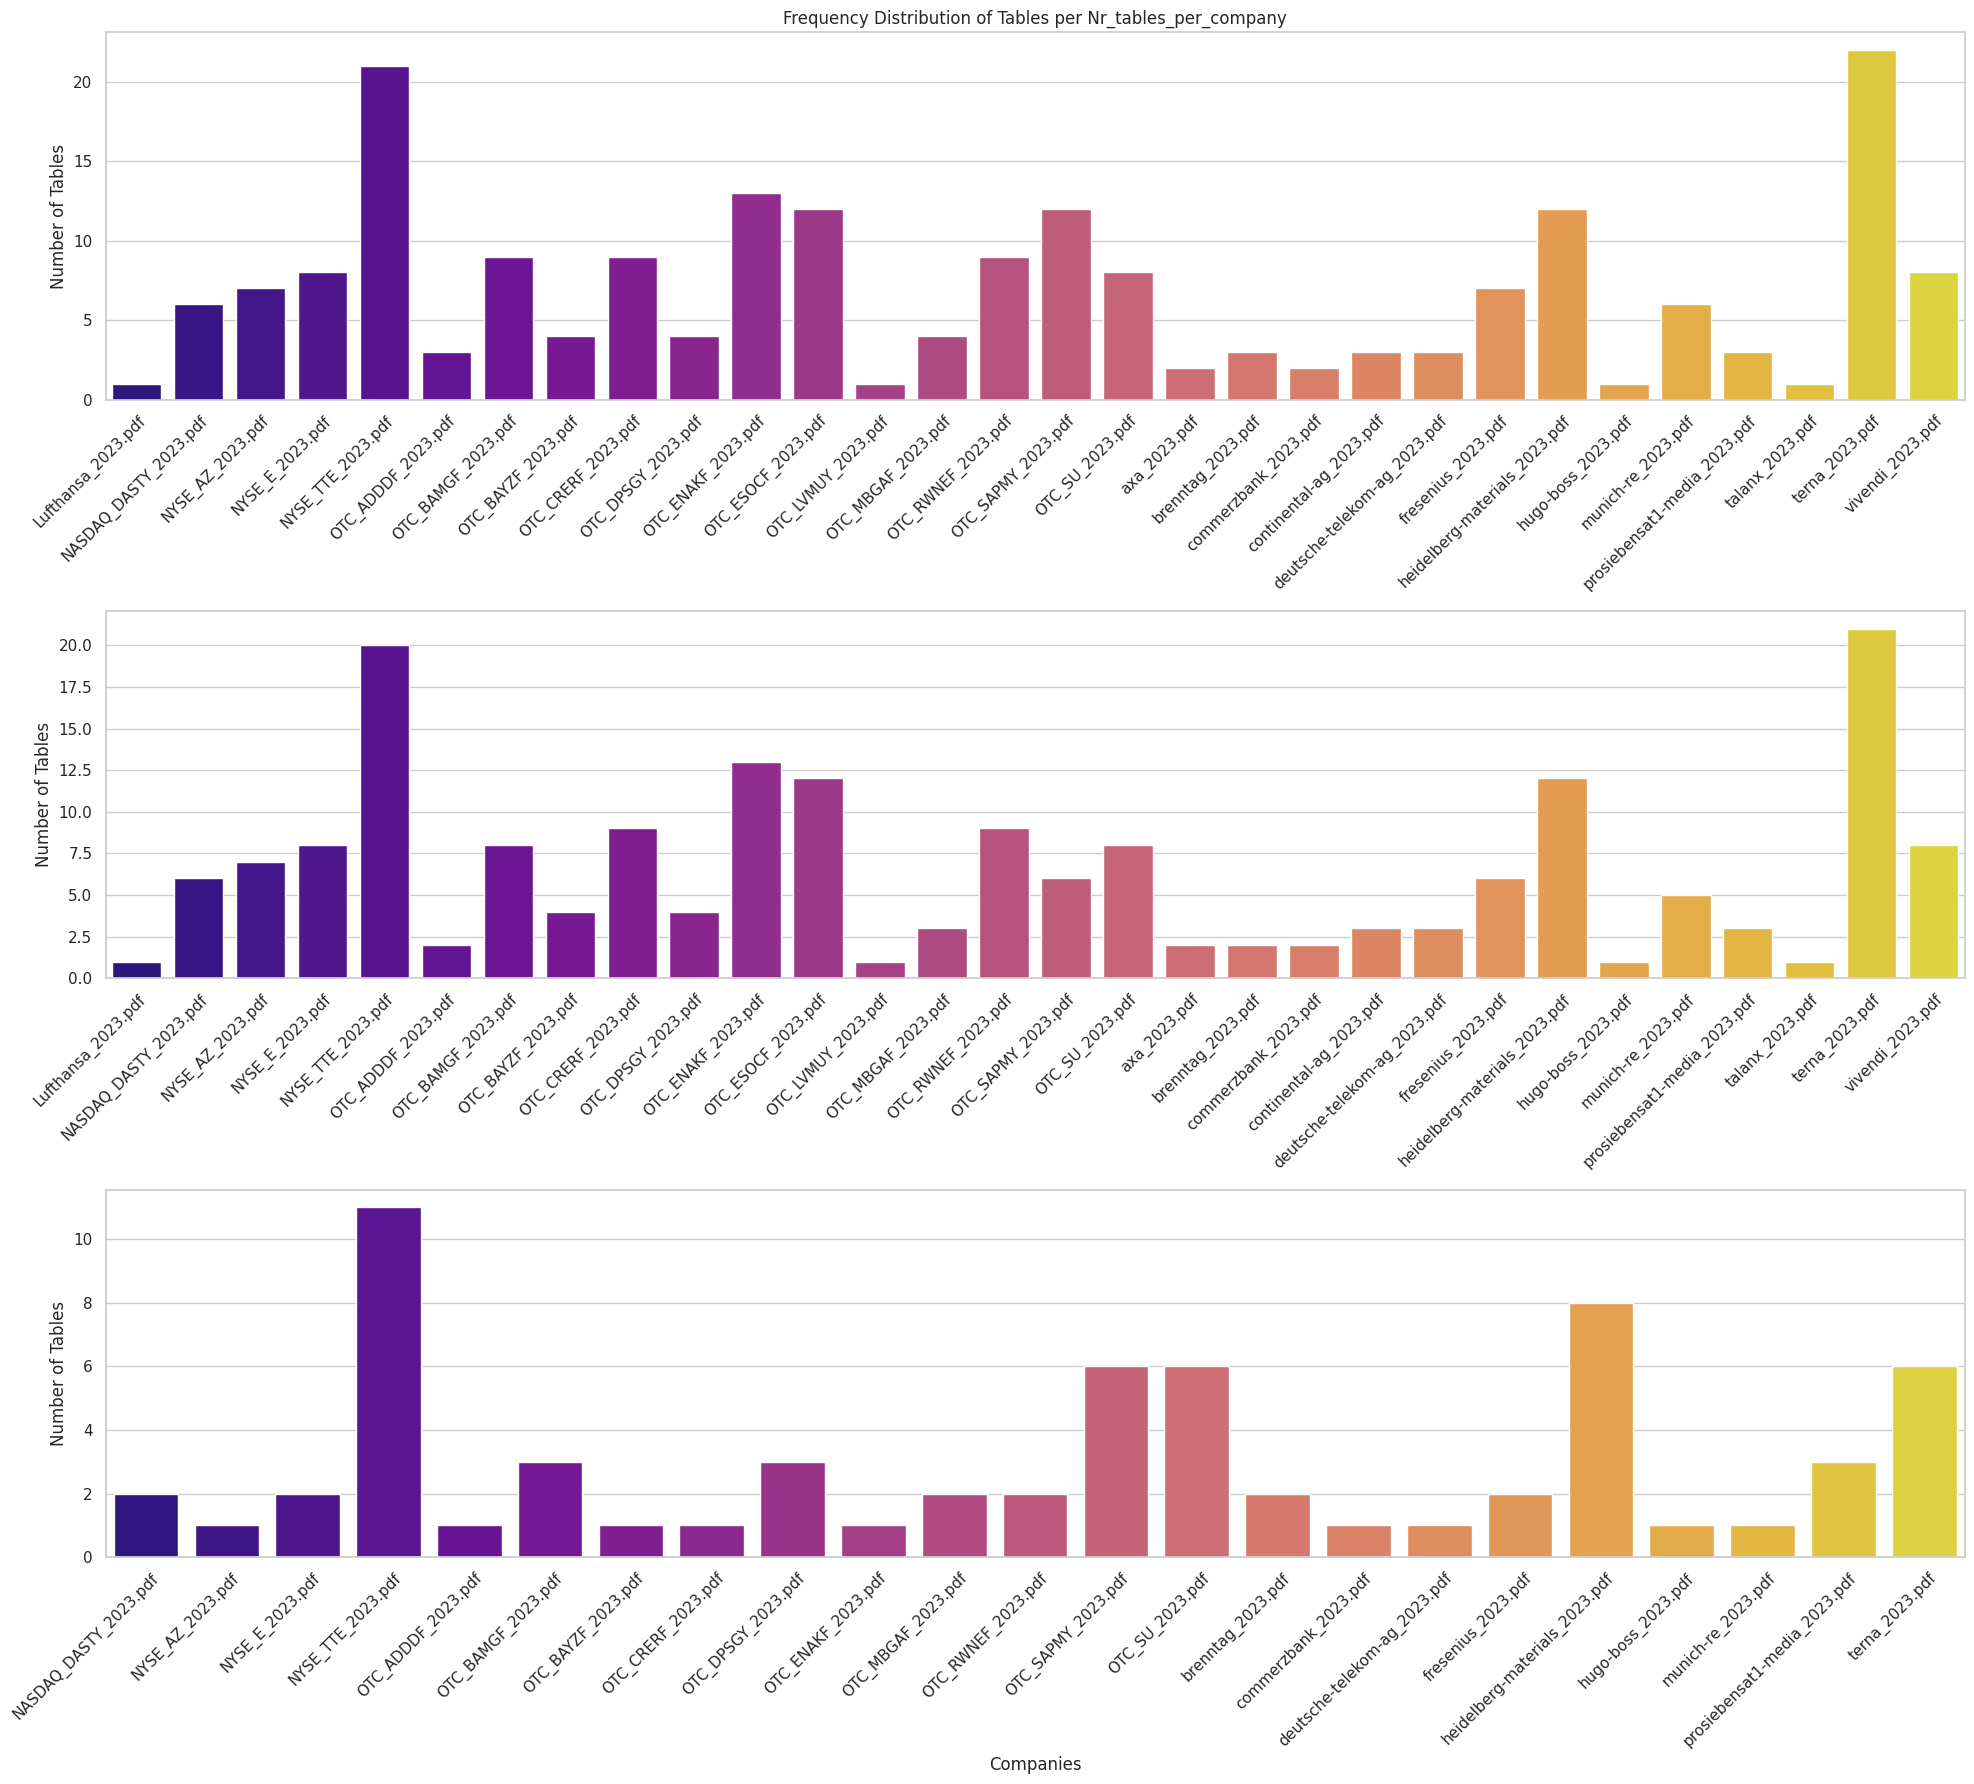

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

count_gri_dfs = [
    ("nr_tables_per_company", stats["nr_tables_per_company"]),
    ("nr_tables_per_company_extr", stats["nr_tables_per_company_extr"]),
    ("nr_tables_per_company_hier", stats["nr_tables_per_company_hier"])
]

plt.figure(figsize=(20, 18))

for i, (name, count_gri) in enumerate(count_gri_dfs, start=1):
    count_gri_df = count_gri.to_frame().reset_index()
    count_gri_df.columns = ["company", "frequency"]
    
    plt.subplot(3, 1, i)
    sns.barplot(data=count_gri_df, x="company", y="frequency", palette="plasma", hue="company", legend=False)
    if i == 1:
        plt.title(f"Frequency Distribution of Tables per {name.capitalize()}")
    else:
        plt.title("")
    plt.ylabel("Number of Tables")
    if i == 3:
        plt.xlabel("Companies")
    else:
        plt.xlabel("")
    plt.xticks(rotation=45, ha="right")
    
    ax = plt.gca()
    new_xticks = [tick + 0.2 for tick in ax.get_xticks()]
    ax.set_xticks(new_xticks)

plt.tight_layout()
plt.show()

/tmp/ipykernel_32468/4082604166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Total", "Extractive", "Hierarchical"], y=frequency_tables, palette="plasma")


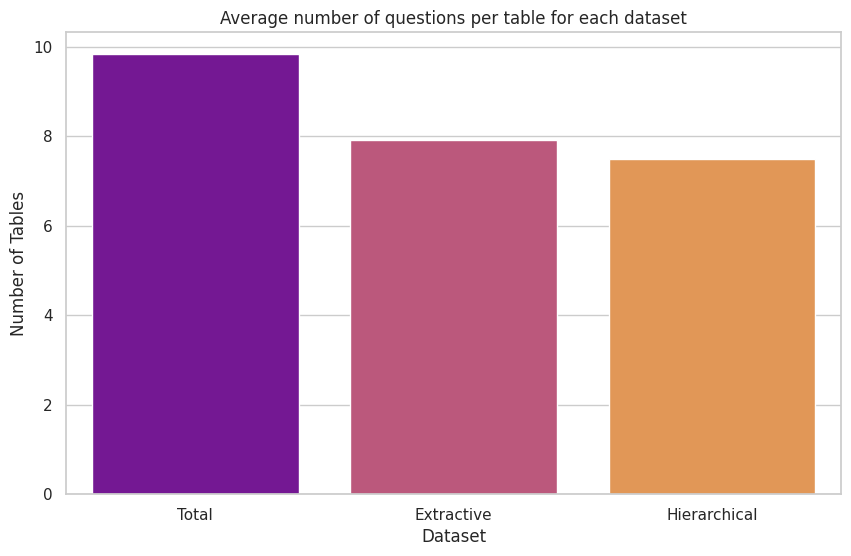

In [90]:
frequency_tables = [stats["avg_questions_per_table"], stats["avg_questions_per_table_extr"], stats["avg_questions_per_table_hier"]]
plt.figure(figsize=(10, 6))
sns.barplot(x=["Total", "Extractive", "Hierarchical"], y=frequency_tables, palette="plasma")
plt.title("Average number of questions per table for each dataset")
plt.ylabel("Number of Tables")
plt.xlabel("Dataset")
plt.show()